In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N_f = np.array([(3, 1), (10, 4), (100, 49)])
Tle = np.array([500, 1000, 1500, 2000])
alphas = np.array([0, 10, 100])

In [42]:
bench = np.zeros((len(N_f), len(Tle), len(alphas)))

for (x, (n, f)) in enumerate(N_f):
    for (y, te) in enumerate(Tle):
        for (z, alpha) in enumerate(alphas):
            values = []
            for j in range(0, 5):
                with open(f"benchs{j}/{n}_{f}_{te}_{alpha}.log", "r") as file:
                    lines = []
                    for line in file:
                        if "[FINISHED]" in line:
                            lines.append(line)

                    local_values = []
                    for line in lines:
                        value = line.split(" ")[-1][:-4]
                        local_values.append(int(value))

                    if len(local_values) == 0:
                        print(f"Error with: benchs{j}/{n}_{f}_{te}_{alpha}")
                        continue

                    values.append(np.min(local_values))

            if (x, y, z) == (1, 3, 2):
                print("Values =", values, np.mean(values), np.median(values))
            bench[x, y, z] = np.mean(values)

for a in range(len(alphas)):
    tmp = []
    for te in range(len(Tle)):
        tmp.append(bench[1, te, a])
    tmp.reverse()
    tmp = np.array(tmp)
    bench[1, :, a] = tmp


Values = [53, 110, 132, 41, 31] 73.4 53.0


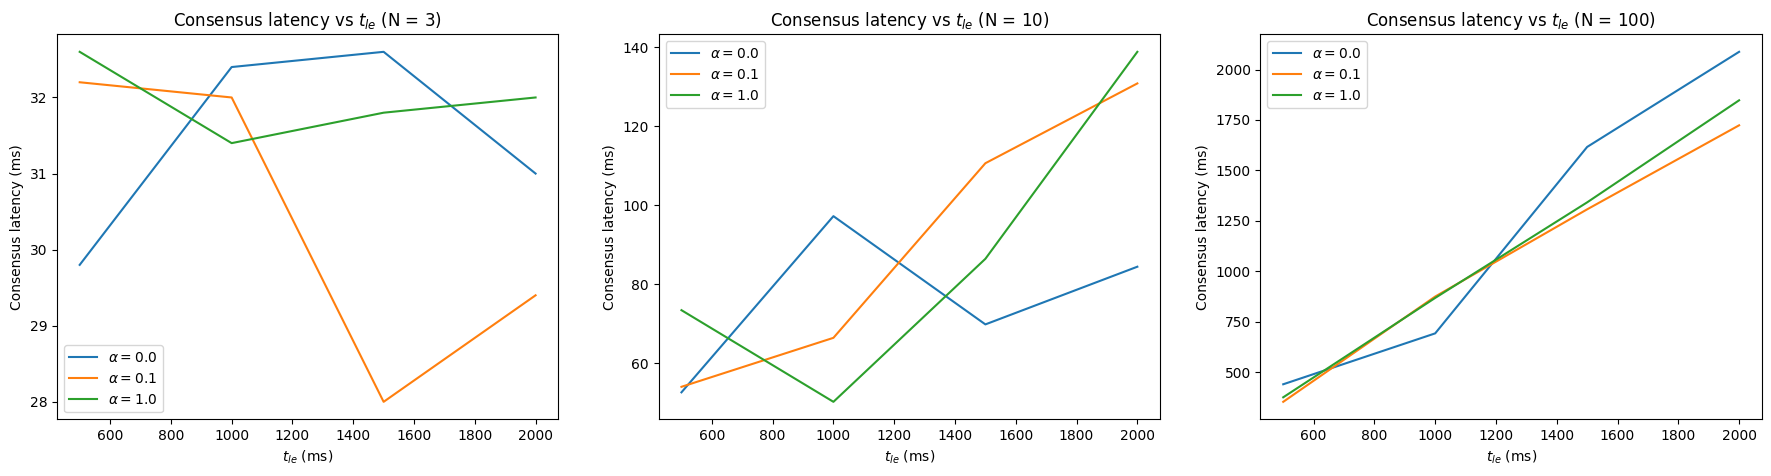

In [43]:
plt.figure(figsize=(22, 5))
for j in range(len(N_f)):
    plt.subplot(1, len(N_f), j + 1)

    i = 0
    for i in range(len(alphas)):
        alpha = alphas[i]
        plt.plot(Tle, bench[j, :, i], label="$\\alpha = " + str(float(alpha) / 100) + "$")
        plt.xlabel("$t_{le}$ (ms)")
        plt.ylabel("Consensus latency (ms)")
        plt.title("Consensus latency vs $t_{le}$ (N = " + str(N_f[j][0]) + ")")
        plt.legend()

plt.show()


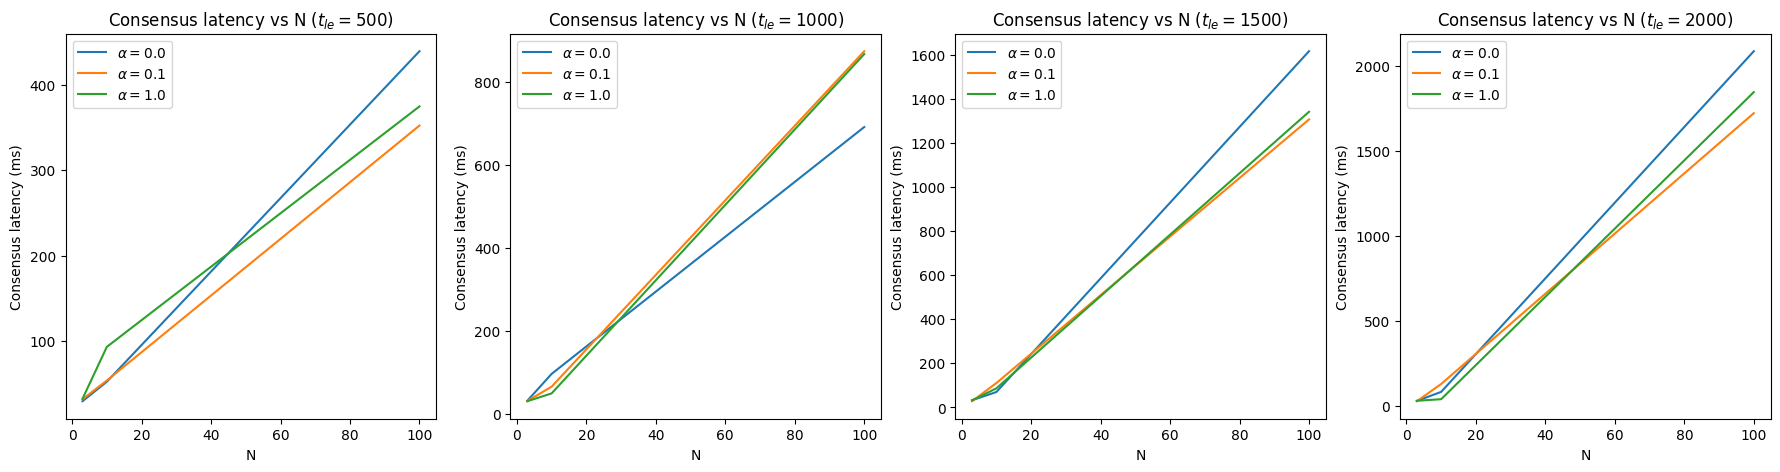

In [38]:
plt.figure(figsize=(22, 5))
for j in range(len(Tle)):
    plt.subplot(1, len(Tle), j + 1)

    i = 0
    for i in range(len(alphas)):
        alpha = alphas[i]
        plt.plot(N_f[:, 0], bench[:, j, i], label="$\\alpha = " + str(float(alpha) / 100) + "$")
        plt.xlabel("N")
        plt.ylabel("Consensus latency (ms)")
        plt.title("Consensus latency vs N ($t_{le} = " + str(Tle[j]) + "$)")
        plt.legend()

plt.show()